Учеников с оценкой равной 0: 37
Учеников без оценки : 6
выше указанных учеников из выборки исключаем, так как не знаем, почему у них такие результаты
Аналзируем исходные данные:
________________________________________________________
________________________________________________________
Поле: school , тип поля: object , значения: ['GP' 'MS']
      Значение: GP , записей: 311
      Значение: MS , записей: 41
________________________________________________________
Поле: sex , тип поля: object , значения: ['F' 'M']
      Значение: F , записей: 182
      Значение: M , записей: 170
________________________________________________________
Поле: age , тип поля: int64 , значения: [18 17 15 16 19 22 20 21]
      Значение: 18 , записей: 69
      Значение: 17 , записей: 90
      Значение: 15 , записей: 76
      Значение: 16 , записей: 96
      Значение: 19 , записей: 16
      Значение: 22 , записей: 1
      Значение: 20 , записей: 3
      Значение: 21 , записей: 1
Изучаем поле  age
Значений 

      Значение: 75.0 , записей: 1
      Значение: 30.0 , записей: 1
      Значение: 19.0 , записей: 1
      Значение: 9.0 , записей: 3
      Значение: 11.0 , записей: 2
      Значение: 38.0 , записей: 1
      Значение: 40.0 , записей: 1
      Значение: 23.0 , записей: 1
      Значение: 17.0 , записей: 1
Изучаем поле  absences
Значений меньше нижнего (2.0) квартиля, строк: 79
Средний квартиль равен (4.0) квартиля /1.5, строк: 100
Значений больше верхнего (8.0) квартиля *1.5 , строк  49
Значений нулевых  76
Значений = nun  10
________________________________________________________
Поле: score , тип поля: float64 , значения: [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.  20.]
      Значение: 30.0 , записей: 15
      Значение: 50.0 , записей: 54
      Значение: 75.0 , записей: 33
      Значение: 55.0 , записей: 46
      Значение: 95.0 , записей: 5
      Значение: 45.0 , записей: 27
      Значение: 60.0 , записей: 31
      Значение: 70.0 , записей: 27
  

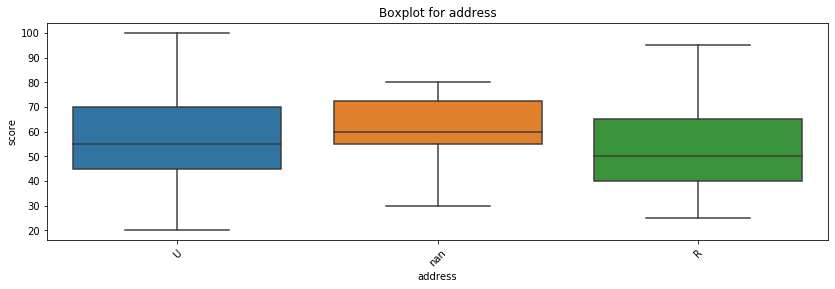

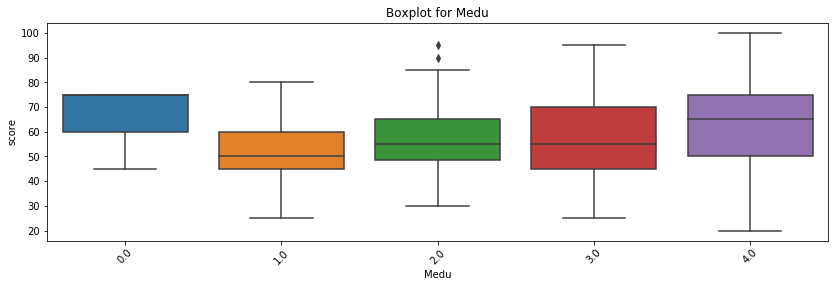

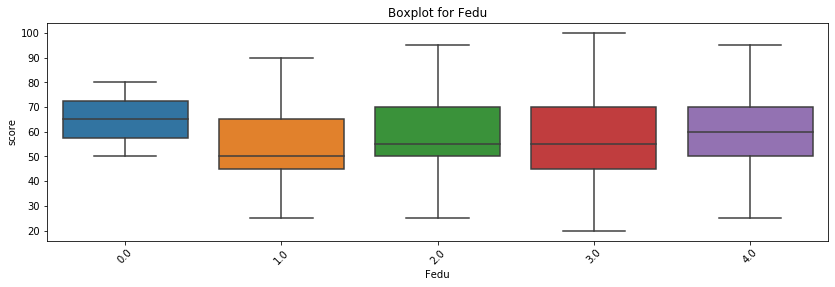

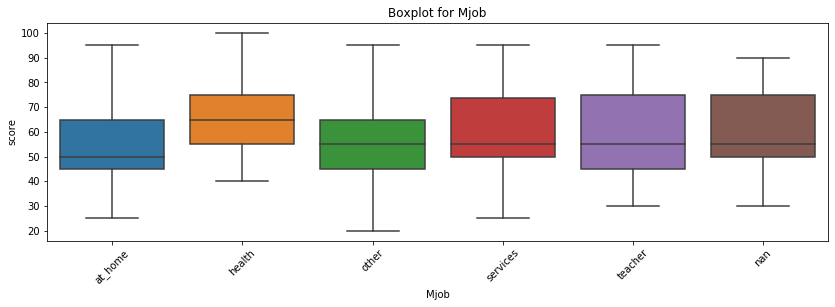

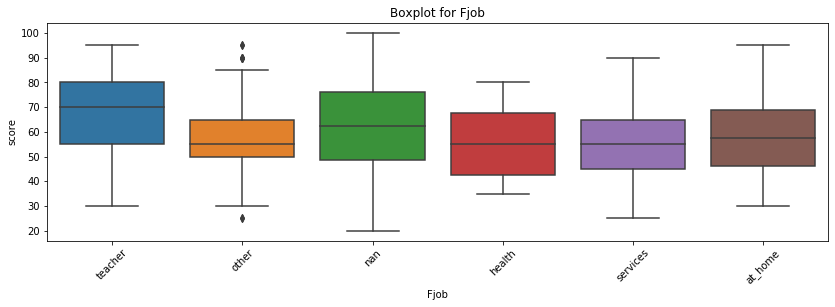

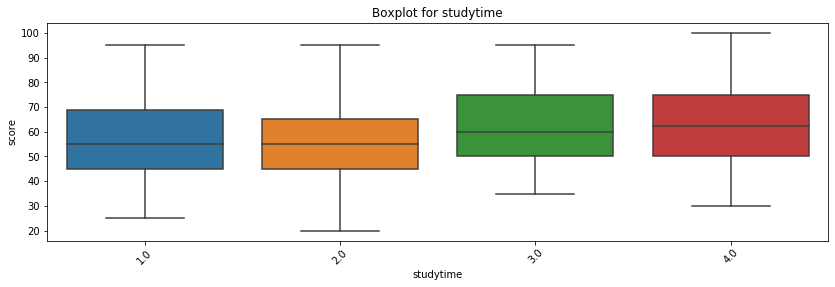

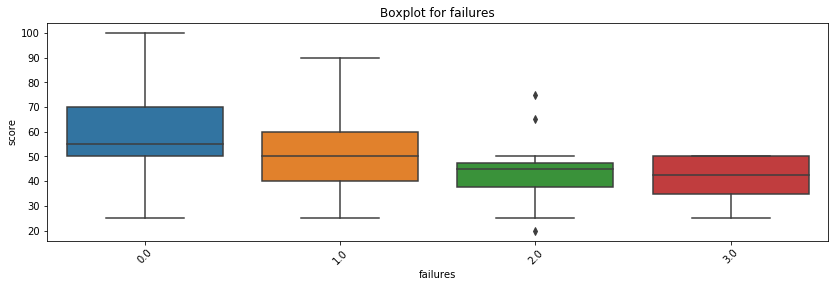

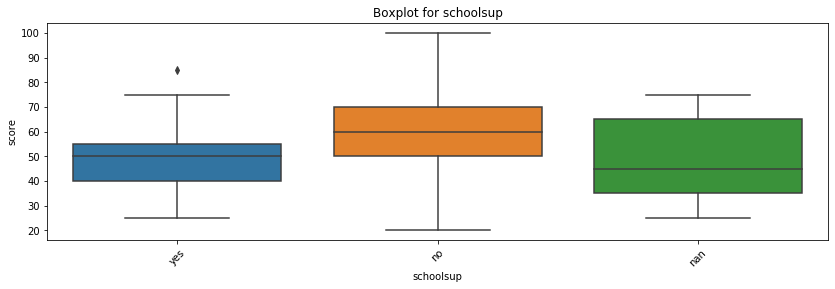

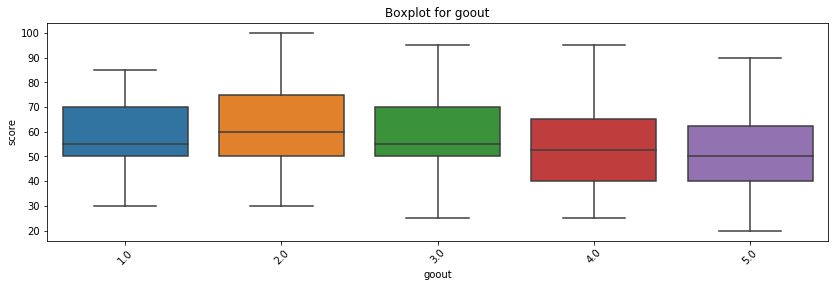

Преобразуем номинативные поля в числовые
Делаем корреляционный анализ по всем ученикам
                age   address      Medu      Fedu      Mjob      Fjob  studytime  failures  schoolsup     goout  absences     score
score     -0.131542  0.081805  0.186477  0.135268 -0.012399  0.003810   0.142055 -0.289377  -0.175885 -0.182286 -0.215539  1.000000
Medu      -0.122979  0.087462  1.000000  0.606270  0.231650  0.097956   0.070533 -0.205944  -0.019304  0.080556  0.077113  0.186477
studytime -0.011426 -0.040995  0.070533 -0.010779  0.009531 -0.120771   1.000000 -0.156406   0.065376 -0.029686 -0.077890  0.142055
Fedu      -0.130010  0.119531  0.606270  1.000000  0.108484  0.145416  -0.010779 -0.268901   0.048975  0.044127  0.030068  0.135268
address   -0.131786  1.000000  0.087462  0.119531  0.024964  0.073372  -0.040995 -0.094574  -0.011154  0.006754  0.003423  0.081805
Fjob       0.034935  0.073372  0.097956  0.145416  0.166133  1.000000  -0.120771 -0.071177  -0.000648  0.047988  0.007625

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

def stuffing(fields):
    print('Изучаем поле ', fields)
    research_field = df[fields]
    quantiles = research_field.quantile([.25, .5, .75], interpolation='midpoint')
    n = 1
    for line in quantiles:
        if n == 1:
            quantiles_min=df[df[fields] < line / 1.5]
            linemin = line
            print('Значений меньше нижнего ('+ str(line) +') квартиля, строк:', len(quantiles_min))
            if len(quantiles_min) < 3 & len(quantiles_min) > 0:
                print(quantiles_min)
        if n == 2:
            linemean = line
        if n == 3:
            quantiles_main=df[(df[fields] > linemin) & (df[fields] < line)]
            print('Средний квартиль равен (' + str(linemean) + ') квартиля /1.5, строк:', len(quantiles_main))
            quantiles_max=df[df[fields] > line * 1.5]
            print('Значений больше верхнего ('+ str(line) +') квартиля *1.5 , строк ', len(quantiles_max))
            if (len(quantiles_max) > 0) & (len(quantiles_max) < 3):
                print(quantiles_max)
        n +=1
    print('Значений нулевых ', len(df[df[fields] == 0]))
    print('Значений = nun ', len(df[(pd.isnull(df[fields]))]))

def filedslist(field_analyz):
    for field_one in field_analyz:
        print('________________________________________________________')
        research_one = df[field_one]
        if (str(df[field_one].dtype) == 'object'):
            df[field_one] = df[field_one].astype(str).apply(lambda x: None if x.strip() == '' else x)
        print('Поле:', field_one, ', тип поля:', research_one.dtype, ', значения:', research_one.unique())
        for value_type in research_one.unique():
            print('      Значение:', value_type, ', записей:', len(df[(df[field_one] == value_type)]))
        if (str(research_one.dtype) == 'int64') | (str(research_one.dtype) == 'float64'):
            df[field_one] = df[field_one].apply(lambda x: None if pd.isnull(x) else x)
            stuffing(field_one)
def convert_fileds(convert_filed, param1, param2, param3='', param4='', param5=''):
    df[convert_filed] = df[convert_filed].astype(str).apply(lambda x: -1 if x.strip() == 'nan' else x)
    df[convert_filed] = df[convert_filed].astype(str).apply(lambda x: -1 if x.strip() == 'None' else x)
    df[convert_filed] = df[convert_filed].astype(str).apply(lambda x: 1 if x.strip() == param1 else x)
    df[convert_filed] = df[convert_filed].astype(str).apply(lambda x: 0 if x.strip() == param2 else x)
    if param3 != '':
        df[convert_filed] = df[convert_filed].astype(str).apply(lambda x: 2 if x.strip() == param3 else x)
    if param4 != '':
        df[convert_filed] = df[convert_filed].astype(str).apply(lambda x: 3 if x.strip() == param4 else x)
    if param5 != '':
        df[convert_filed] = df[convert_filed].astype(str).apply(lambda x: 4 if x.strip() == param5 else x)
    df[convert_filed] = df[convert_filed].apply(pd.to_numeric)

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.expand_frame_repr = False

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 350) # показывать больше строк
df = pd.read_csv('stud_math.xls', sep=',')
df.drop(['studytime, granular'], axis='columns', inplace=True)
df.Fedu = df.Fedu.apply(lambda x: 4 if x == 40 else x)
df.famrel = df.famrel.apply(lambda x: 1 if x == -1 else x)
df.absences = df.absences.apply(lambda x: 0 if x == 212 else x)
df.absences = df.absences.apply(lambda x: 0 if x == 385 else x)
print('Учеников с оценкой равной 0:', len(df[(df.score == 0)]))
print('Учеников без оценки :', len(df[(pd.isnull(df.score))]))
print('выше указанных учеников из выборки исключаем, так как не знаем, почему у них такие результаты')
df = df.drop(df[df.score == 0].index)
df = df.drop(df[pd.isnull(df.score)].index)
print('Аналзируем исходные данные:')
print('________________________________________________________')
filedslist(df.columns.tolist())
print('________________________________________________________')
print('Проверим все поля тестом Стьюдента')
for col in ['school','sex','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian',
            'traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher',
            'internet','romantic','famrel','freetime','goout','health']:
    get_stat_dif(col)
print('________________________________________________________')
print('Оставляем для анализа поля: address, Medu, Fedu, Mjob, Fjob, studytime, failures, schoolsup, goout')
print('Построим по ним графики')
for col in ['address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'goout']:
    get_boxplot(col)
print('Преобразуем номинативные поля в числовые')
convert_fileds('address','U','R')
convert_fileds('Mjob','at_home', 'health', 'other', 'services', 'teacher')
convert_fileds('Fjob','at_home', 'health', 'other', 'services', 'teacher')
convert_fileds('schoolsup','yes','no')
model = df.loc[:, ['age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'goout', 'absences', 'score']]
print('Делаем корреляционный анализ по всем ученикам')
scope = model.corr().sort_values('score', ascending=False)
print(scope)
print('По нему видно положительную связь по полям Medu, Fudu, и studytime')
print('Чтобы увидеть, какие критерии влияют на оценки учеников разбиваем массив данных на три группы')
print('по "не успевающим ученикам", "успевающим" и "отличникам"')
print('списки отсортированы по убыванию оценки по математике')
print('не успевающими признаются ученики у которых score <= 45')
print('успевающими признаются ученики у которых score > 45 и <= 70')
print('отличниками признаются ученики у которых score > 70')

luggage = model[(model['score'] <= 45)]
luggage_scope = luggage.corr().sort_values('score', ascending=False).index
print('не успевающие')
print(luggage.corr().sort_values('score', ascending=False))
avg = model[(model['score'] > 45) & (model['score'] <= 70)]
avg_scope = avg.corr().sort_values('score', ascending=False).index
print('________________________________________________________')
print('успевающие')
print(avg.corr().sort_values('score', ascending=False))
stars = model[(model['score'] > 70)]
stars_scope = stars.corr().sort_values('score', ascending=False).index
print('________________________________________________________')
print('отличники')
print(stars.corr().sort_values('score', ascending=False))
print('________________________________________________________')
print('Так как у нас указана сортировка по оценке то у каждой группы учеников будет свой рэнкинг полей которые влияют на успеваемость')
print('Включим этот порядок в общую группу')
luggage_df = pd.DataFrame(luggage_scope)
avg_df = pd.DataFrame(avg_scope)
stars_df = pd.DataFrame(stars_scope)
final_scope = pd.concat([luggage_df, avg_df, stars_df], axis=1)
final_scope.columns=['luggage','avg','stars']
final_scope = final_scope.drop(final_scope[final_scope.luggage == 'score'].index)
print(final_scope)
print('Факты')
print('1. У отличников как это не странно играет большу роль количество пропущеных уроков, но следующими параметрами будут образование матери и время потраченое на учебу помимо школы')
print('2. У двоешников на первом месте место проживание, время потраченое на учебу помимо школы, и возраст')
print('3. Чем хуже оценки у учащегося, тем меньше данных корелируют с его оценкой')
print('4. Учащиеся проживающие в городе куда более сильно подвержены плохой учебе')
print('5. Если кто то из родителей домохозяйки, то вероятность у ученика стать не успевающим меньше')
print('Выводы')
print('Если учащийся живет в городе, оба родителя работают,')
print('образование матери не 5-9 классов, образование отца не среднее, ')
print('тратит время на учёбу помимо школы меньше 5 часов в неделю, ')
print('и проводит много чвремени с друзьями, то вероятность стать не успевающим учеником наиболее высокая. Менно на таких учащихся надо смотреть как на зону риска')